In [1]:
import pandas as pd
import datetime as dt
import nsepy as nse
import pickle as pk

start_date = dt.date(2001,1,1)
end_date = dt.date(2019,1,31)

In [2]:
#data = nse.get_history(symbol="NIFTY 50", start=start_date, end=end_date, index=True)
#pickle_dump = open('nifty_data.pkl', 'ab')
#pk.dump(data,pickle_dump)
#pickle_dump.close()
#data.head()

In [3]:
pickle_dump = open('nifty_data.pkl', 'rb')
data = pk.load(pickle_dump)
pickle_dump.close()
data.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2001-01-01,1263.50,1276.15,1250.65,1254.30,60533274,2.054040e+10
2001-01-02,1254.25,1279.60,1248.55,1271.80,72271588,2.396310e+10
2001-01-03,1271.80,1293.55,1263.95,1291.25,99079153,3.065460e+10
2001-01-04,1291.30,1331.35,1291.30,1307.65,106441914,3.483970e+10
2001-01-05,1307.55,1330.30,1306.25,1327.25,98830568,3.639040e+10


In [4]:
data = data.reset_index()
data.head()

,Date,Open,High,Low,Close,Volume,Turnover
0,2001-01-01,1263.50,1276.15,1250.65,1254.30,60533274,2.054040e+10
1,2001-01-02,1254.25,1279.60,1248.55,1271.80,72271588,2.396310e+10
2,2001-01-03,1271.80,1293.55,1263.95,1291.25,99079153,3.065460e+10
3,2001-01-04,1291.30,1331.35,1291.30,1307.65,106441914,3.483970e+10
4,2001-01-05,1307.55,1330.30,1306.25,1327.25,98830568,3.639040e+10


In [5]:
window_size = 60
sliding_window_size = 30 #gap between start dates of two consecutive windows
analysis_window = []
windows = ((end_date - start_date).days/sliding_window_size)
first_window_size = (1+windows-int(windows))*sliding_window_size - sliding_window_size + window_size
first_window_size = round(first_window_size)
first_window_size = dt.timedelta(first_window_size)
first_window_size
all_other_windows = dt.timedelta(30)
windows = int(windows)
for window in range(windows):
    if window == 0:
        window_start_date = start_date
        window_end_date = start_date + first_window_size
    else:
        window_start_date = window_start_date+dt.timedelta(sliding_window_size)
        window_end_date = window_start_date+dt.timedelta(window_size)
    analysis_window.append((window_start_date, window_end_date))
    print('window: ','start_date:',window_start_date,' end_date:', window_end_date)

window:  start_date: 2001-01-01  end_date: 2001-03-06
window:  start_date: 2001-01-31  end_date: 2001-04-01
window:  start_date: 2001-03-02  end_date: 2001-05-01
window:  start_date: 2001-04-01  end_date: 2001-05-31
window:  start_date: 2001-05-01  end_date: 2001-06-30
window:  start_date: 2001-05-31  end_date: 2001-07-30
window:  start_date: 2001-06-30  end_date: 2001-08-29
window:  start_date: 2001-07-30  end_date: 2001-09-28
window:  start_date: 2001-08-29  end_date: 2001-10-28
window:  start_date: 2001-09-28  end_date: 2001-11-27
window:  start_date: 2001-10-28  end_date: 2001-12-27
window:  start_date: 2001-11-27  end_date: 2002-01-26
window:  start_date: 2001-12-27  end_date: 2002-02-25
window:  start_date: 2002-01-26  end_date: 2002-03-27
window:  start_date: 2002-02-25  end_date: 2002-04-26
window:  start_date: 2002-03-27  end_date: 2002-05-26
window:  start_date: 2002-04-26  end_date: 2002-06-25
window:  start_date: 2002-05-26  end_date: 2002-07-25
window:  start_date: 2002-06

In [6]:
analysis_window

[(datetime.date(2001, 1, 1), datetime.date(2001, 3, 6)),
 (datetime.date(2001, 1, 31), datetime.date(2001, 4, 1)),
 (datetime.date(2001, 3, 2), datetime.date(2001, 5, 1)),
 (datetime.date(2001, 4, 1), datetime.date(2001, 5, 31)),
 (datetime.date(2001, 5, 1), datetime.date(2001, 6, 30)),
 (datetime.date(2001, 5, 31), datetime.date(2001, 7, 30)),
 (datetime.date(2001, 6, 30), datetime.date(2001, 8, 29)),
 (datetime.date(2001, 7, 30), datetime.date(2001, 9, 28)),
 (datetime.date(2001, 8, 29), datetime.date(2001, 10, 28)),
 (datetime.date(2001, 9, 28), datetime.date(2001, 11, 27)),
 (datetime.date(2001, 10, 28), datetime.date(2001, 12, 27)),
 (datetime.date(2001, 11, 27), datetime.date(2002, 1, 26)),
 (datetime.date(2001, 12, 27), datetime.date(2002, 2, 25)),
 (datetime.date(2002, 1, 26), datetime.date(2002, 3, 27)),
 (datetime.date(2002, 2, 25), datetime.date(2002, 4, 26)),
 (datetime.date(2002, 3, 27), datetime.date(2002, 5, 26)),
 (datetime.date(2002, 4, 26), datetime.date(2002, 6, 25))

In [7]:
data.head()

,Date,Open,High,Low,Close,Volume,Turnover
0,2001-01-01,1263.50,1276.15,1250.65,1254.30,60533274,2.054040e+10
1,2001-01-02,1254.25,1279.60,1248.55,1271.80,72271588,2.396310e+10
2,2001-01-03,1271.80,1293.55,1263.95,1291.25,99079153,3.065460e+10
3,2001-01-04,1291.30,1331.35,1291.30,1307.65,106441914,3.483970e+10
4,2001-01-05,1307.55,1330.30,1306.25,1327.25,98830568,3.639040e+10


In [113]:
window=7
df = data[(data.Date >= analysis_window[window][0]) & (data.Date <= analysis_window[window][1])]
df.head()

,Date,Open,High,Low,Close,Volume,Turnover
145,2001-07-30,1051.45,1062.80,1050.90,1061.45,26457025,6.383500e+09
146,2001-07-31,1061.45,1076.35,1053.60,1072.85,34607069,8.135400e+09
147,2001-08-01,1073.00,1077.70,1059.75,1063.15,53427200,1.210400e+10
148,2001-08-02,1064.25,1070.05,1059.55,1066.00,43294501,9.863000e+09
149,2001-08-03,1066.40,1077.55,1066.20,1074.60,43832220,1.090030e+10


In [114]:
import matplotlib.pyplot as plt
%matplotlib inline

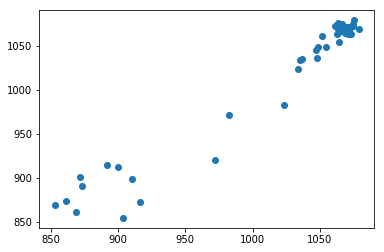

In [115]:
plt.scatter(df.Open, df.Close)

In [116]:
import mpl_finance as mf

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 145 to 187
Data columns (total 7 columns):
Date        43 non-null object
Open        43 non-null float64
High        43 non-null float64
Low         43 non-null float64
Close       43 non-null float64
Volume      43 non-null int64
Turnover    43 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ KB


In [118]:
from matplotlib.dates import date2num
import matplotlib.dates as mdates
df['Matplotlib_Date'] = df['Date'].apply(date2num)
df['x_axis'] = df['Matplotlib_Date'] - min(df['Matplotlib_Date'])
df['y_axis'] = (df['Close']/df['Close'].values[-1])*1000
df

c:\users\bhangale_s\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\bhangale_s\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\bhangale_s\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A val

,Date,Open,High,Low,Close,Volume,Turnover,Matplotlib_Date,x_axis,y_axis
145,2001-07-30,1051.45,1062.80,1050.90,1061.45,26457025,6.383500e+09,730696.0,0.0,1161.514472
146,2001-07-31,1061.45,1076.35,1053.60,1072.85,34607069,8.135400e+09,730697.0,1.0,1173.989167
147,2001-08-01,1073.00,1077.70,1059.75,1063.15,53427200,1.210400e+10,730698.0,2.0,1163.374733
148,2001-08-02,1064.25,1070.05,1059.55,1066.00,43294501,9.863000e+09,730699.0,3.0,1166.493407
149,2001-08-03,1066.40,1077.55,1066.20,1074.60,43832220,1.090030e+10,730700.0,4.0,1175.904142
150,2001-08-06,1074.20,1082.40,1072.55,1075.25,37036989,7.922600e+09,730703.0,7.0,1176.615418
151,2001-08-07,1074.35,1079.30,1070.20,1072.10,26869345,6.225000e+09,730704.0,8.0,1173.168463
152,2001-08-08,1071.75,1072.10,1059.55,1068.00,28799186,7.531600e+09,730705.0,9.0,1168.681950
153,2001-08-09,1068.10,1072.60,1061.40,1070.65,26832655,6.531700e+09,730706.0,10.0,1171.581769
154,2001-08-10,1070.65,1076.70,1069.05,1071.15,25904867,5.893500e+09,730707.0,11.0,1172.128905


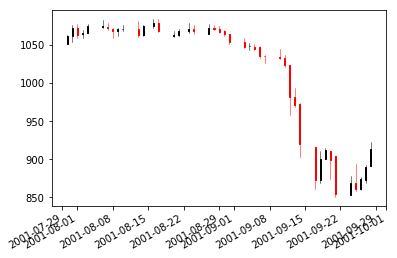

In [119]:
fig, ax = plt.subplots()
quotes = [tuple(x) for x in df[['Matplotlib_Date','Open','High','Low','Close']].values]
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gcf().autofmt_xdate()

_ = mf.candlestick_ohlc(ax,quotes)

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
df.x_axis.shape

(43,)

In [122]:
X = df.x_axis.values.reshape(df.x_axis.shape[0],1)
y = df.y_axis
reg = LinearRegression().fit(X, y)

In [123]:
y_pred = reg.predict(X)
y_pred

array([1226.54294522, 1222.68204522, 1218.82114521, 1214.9602452 ,
       1211.09934519, 1199.51664517, 1195.65574517, 1191.79484516,
       1187.93394515, 1184.07304514, 1172.49034512, 1168.62944512,
       1160.9076451 , 1157.04674509, 1145.46404507, 1141.60314507,
       1133.88134505, 1130.02044504, 1118.43774502, 1114.57684502,
       1110.71594501, 1106.855045  , 1102.99414499, 1091.41144497,
       1087.55054497, 1083.68964496, 1079.82874495, 1075.96784494,
       1064.38514492, 1060.52424492, 1056.66334491, 1052.8024449 ,
       1048.94154489, 1037.35884487, 1033.49794487, 1029.63704486,
       1025.77614485, 1021.91524484, 1010.33254482, 1006.47164482,
       1002.61074481,  998.7498448 ,  994.8889448 ])

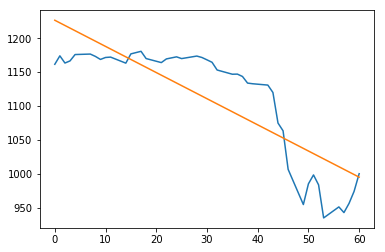

In [124]:
plt.plot(X.flatten(),y)
plt.plot(X.flatten(),y_pred)

In [125]:
from sklearn.metrics import mean_squared_error
import numpy as np
np.sqrt(mean_squared_error(y,y_pred)) #error

46.27719353257696

In [126]:
(reg.coef_/1000)*100, reg.intercept_

(array([-0.38609]), 1226.542945223173)

In [127]:
data[(data.Date >= analysis_window[window+1][0]) & (data.Date <= analysis_window[window+1][1])]['Close'].iloc[10]

982.2

In [128]:
import zigzag as zg

In [129]:
np.random.seed(1997)
pivots = zg.peak_valley_pivots(y.values, 0.005, -0.005)

In [130]:
pivots

array([-1,  1, -1,  0,  0,  1,  0,  0,  0,  0, -1,  0,  1,  0, -1,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  1,  0, -1,  1, -1,  0,  0,  1])

In [131]:
def plot_pivots(X, y, pivots):
    plt.xlim(X.min(), X.max())
    plt.ylim(y.min()*0.99, y.max()*1.01)
    plt.plot(X, y, 'k:', alpha=0.5)
    plt.plot(X[pivots != 0], y[pivots != 0], 'k-')
    plt.scatter(X[pivots == 1], y[pivots == 1], color='g')
    plt.scatter(X[pivots == -1], y[pivots == -1], color='r')

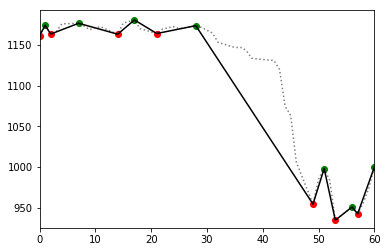

In [132]:
plot_pivots(X.flatten(),y.values, pivots)

In [133]:
def get_downtrend_length(X,y,pivots,inverse_method_used=False):
    l=1
    tops = y.values[pivots == 1]
    for i in range(len(tops)-1):
        ix = -1*(i+1)
        if tops[ix] < tops[ix-1]:
            l = l+1
        else:
            break
    print('downtrend ON from ',l,' tops from end.')
    if inverse_method_used == False:
        length = X[-1][0] - X[np.where(pivots == 1)[0][-1*l]][0]
    else:
        length = X[-1][0] - X[np.where(pivots != 0)[0][-3]][0]
    return length

def get_uptrend_length(X,y,pivots,inverse_method_used=False):
    l=1
    bottoms = y.values[pivots == -1]
    for i in range(len(bottoms)-1):
        ix = -1*(i+1)
        if bottoms[ix] > bottoms[ix-1]:
            l = l+1
        else:
            break
    print('uptrend ON from ',l,' bottoms from end.')
    if inverse_method_used == False:
        length = X[-1][0] - X[np.where(pivots == -1)[0][-1*l]][0]
    else:
        length = X[-1][0] - X[np.where(pivots != 0)[0][-3]][0]
    return length

In [134]:
prev_i = 0
uptrend = False
downtrend = False
inverse_method_used = False  #Uptrend is determined when there are higher bottoms and
                             #Downtrend is determined when there are lower tops.
                             #But if there are not enough points to determine the trend, inverse method is used.
                             #i.e. by looking at the lower bottoms for downtrend or higher tops for uptrend

check = y.values[pivots == 1][-2:]
if check[1] < check[0]:
    downtrend = True

check = y.values[pivots == -1][-2:]
if check[1] > check[0]:
    uptrend = True

if uptrend or downtrend:
    pass
else:
    y1 = y.values[pivots != 0][-3]
    y2 = y.values[pivots != 0][-1]
    if y1 < y2:
        uptrend = True
    else:
        downtrend = True
    inverse_method_used = True

if uptrend:
    trend_length = get_uptrend_length(X,y,pivots,inverse_method_used)
if downtrend:
    trend_length = get_downtrend_length(X,y,pivots,inverse_method_used)
trend_length

uptrend ON from  2  bottoms from end.


7.0

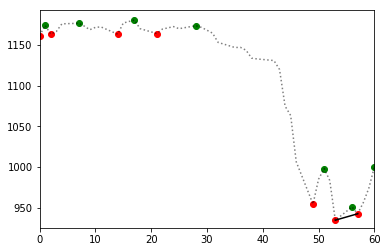

In [135]:
max_points_for_trend = 4

def get_turning_points_for_trend(pivots,trend_length, pvt, max_points_for_trend = 4, inverse_method_used = False):
    if inverse_method_used:
        turning_points = 2
        return turning_points
    
    trend_started_from = len(pivots) - trend_length
    turning_points = len(np.where(np.where(pivots==pvt)[0] >= trend_started_from)[0])
    if turning_points > max_points_for_trend:
        turning_points = max_points_for_trend
    return turning_points

def get_trend_line(X,y,turning_points_for_trend,pivots,pvt, inverse_method_used = False):
    y_for_reg = y.values[pivots==pvt][-1*turning_points_for_trend:]
    X_for_reg = X[np.where(pivots==pvt)[0][-1*turning_points_for_trend:]]
    reg = LinearRegression().fit(X_for_reg, y_for_reg)
    y_pred = reg.predict(X_for_reg)
    return y_pred, reg.coef_

if uptrend: 
    pvt = -1
    if inverse_method_used:
        pvt = pvt*-1
    turning_points_for_trend = get_turning_points_for_trend(pivots,trend_length, pvt, max_points_for_trend, inverse_method_used)
    trend_line, trend_slope = get_trend_line(X,y,turning_points_for_trend,pivots,pvt, inverse_method_used)
    
if downtrend:
    pvt = 1
    if inverse_method_used:
        pvt = pvt*-1
    turning_points_for_trend = get_turning_points_for_trend(pivots,trend_length, pvt, max_points_for_trend, inverse_method_used)
    trend_line, trend_slope = get_trend_line(X,y,turning_points_for_trend,pivots,pvt, inverse_method_used)
    
plt.xlim(X.min(), X.max())
plt.ylim(y.min()*0.99, y.max()*1.01)
plt.plot(X, y, 'k:', alpha=0.5)
plt.plot(X[np.where(pivots==pvt)[0][-1*turning_points_for_trend:]], trend_line, 'k-')
plt.scatter(X[pivots == 1], y[pivots == 1], color='g')
plt.scatter(X[pivots == -1], y[pivots == -1], color='r')

In [136]:
trend_slope, turning_points_for_trend

(array([1.96968868]), 2)